In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Yash\Downloads\BreastCancer.csv")
#df

In [3]:
df.shape

(699, 12)

In [4]:
df.dtypes

Unnamed: 0           int64
Id                   int64
Cl.thickness         int64
Cell.size            int64
Cell.shape           int64
Marg.adhesion        int64
Epith.c.size         int64
Bare.nuclei        float64
Bl.cromatin          int64
Normal.nucleoli      int64
Mitoses              int64
Class               object
dtype: object

In [5]:
df.Class.value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

In [6]:
df.Class.replace({"benign":0,"malignant":1},inplace = True)

In [7]:
df.columns

Index(['Unnamed: 0', 'Id', 'Cl.thickness', 'Cell.size', 'Cell.shape',
       'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin',
       'Normal.nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
df = df.rename(columns = {'Bare.nuclei':'BaN'})

In [9]:
df = df.rename(columns = {'Unnamed: 0':'Index'})

In [10]:
df.isnull().sum()

Index               0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
BaN                16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [11]:
df.BaN.value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: BaN, dtype: int64

In [12]:
df.BaN = df.BaN.fillna(df["BaN"].median())

In [13]:
df.isnull().sum()

Index              0
Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
BaN                0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [14]:
df.head(20)

,Index,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,BaN,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,0
1,2,1002945,5,4,4,5,7,10.0,3,2,1,0
2,3,1015425,3,1,1,1,2,2.0,3,1,1,0
3,4,1016277,6,8,8,1,3,4.0,3,7,1,0
4,5,1017023,4,1,1,3,2,1.0,3,1,1,0
5,6,1017122,8,10,10,8,7,10.0,9,7,1,1
6,7,1018099,1,1,1,1,2,10.0,3,1,1,0
7,8,1018561,2,1,2,1,2,1.0,3,1,1,0
8,9,1033078,2,1,1,1,2,1.0,1,1,5,0
9,10,1033078,4,2,1,1,2,1.0,2,1,1,0


In [15]:
df["Index"].value_counts()

1      1
470    1
462    1
463    1
464    1
      ..
235    1
236    1
237    1
238    1
699    1
Name: Index, Length: 699, dtype: int64

In [16]:
#dividing the data using train and test
#df1 = df.iloc[0:400,0:10]
#df2 = df.iloc[400:,10:]

In [17]:
#df1
#df2

In [18]:
df.drop_duplicates(inplace = True)
df.shape

(699, 12)

In [19]:
data = df.corr()

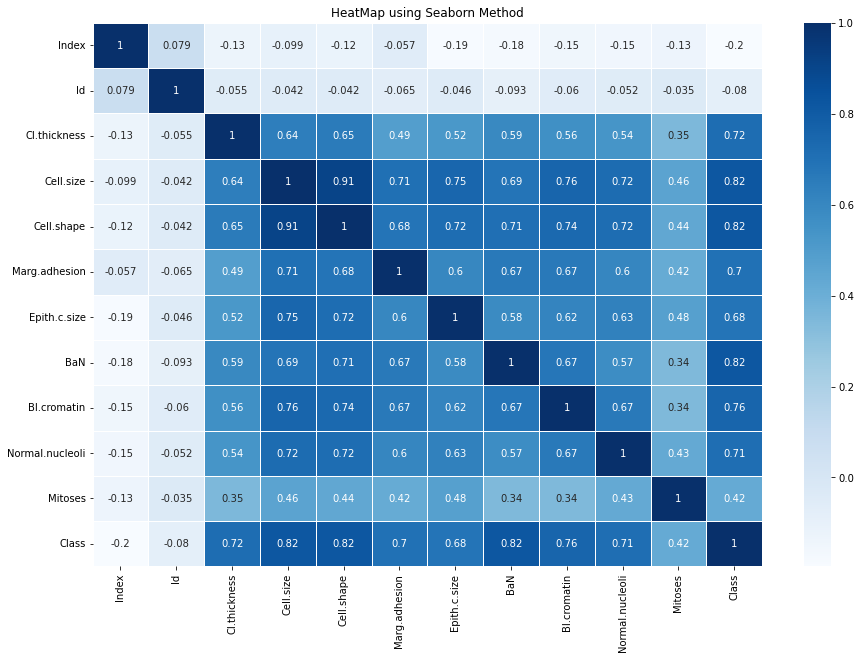

In [20]:
plt.figure(figsize=(15,10))
heat_map = sns.heatmap( data,linewidth = 1, annot=True,cmap = plt.cm.Blues)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

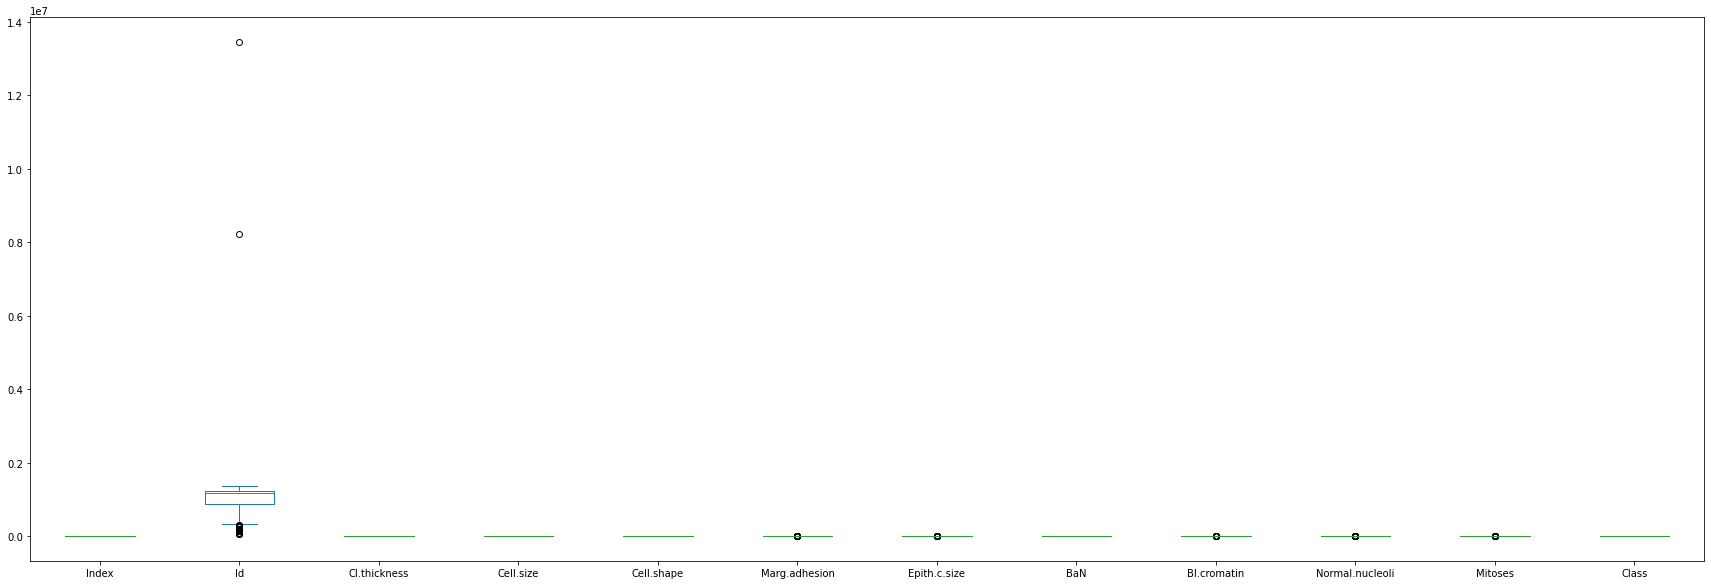

In [21]:
df.plot.box(figsize =(30,10))
plt.show()

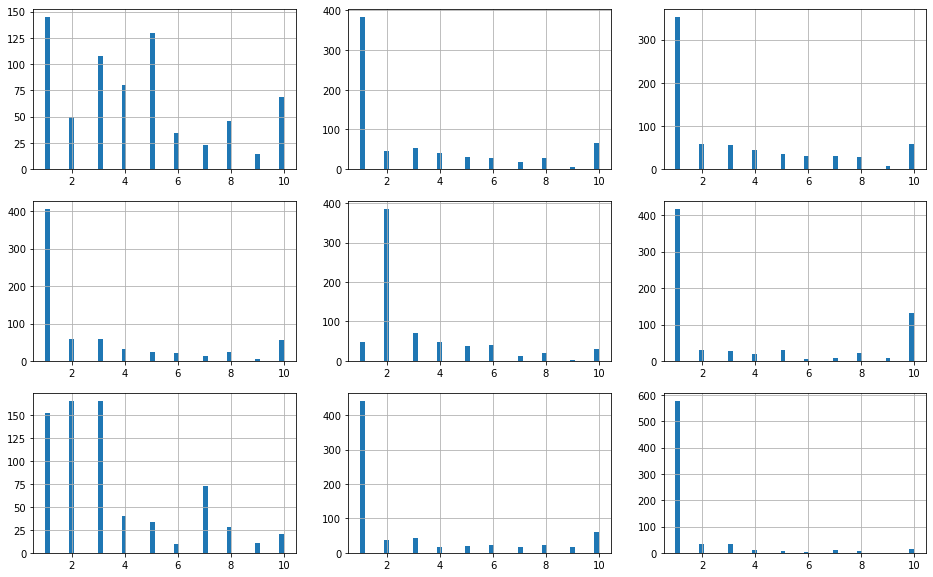

In [22]:
fig,ax = plt.subplots(3,3,figsize = (16,10))
df["Cl.thickness"].hist(bins = 50,ax = ax[0][0])
df['Cell.size'].hist(bins = 50,ax = ax[0][1])
df['Cell.shape'].hist(bins = 50,ax = ax[0][2])
df['Marg.adhesion'].hist(bins = 50,ax = ax[1][0])
df['Epith.c.size'].hist(bins = 50,ax = ax[1][1])
df['BaN'].hist(bins = 50,ax = ax[1][2])
df['Bl.cromatin'].hist(bins = 50,ax = ax[2][0])
df['Normal.nucleoli'].hist(bins = 50,ax = ax[2][1])
df['Mitoses'].hist(bins = 50,ax = ax[2][2])
plt.show()

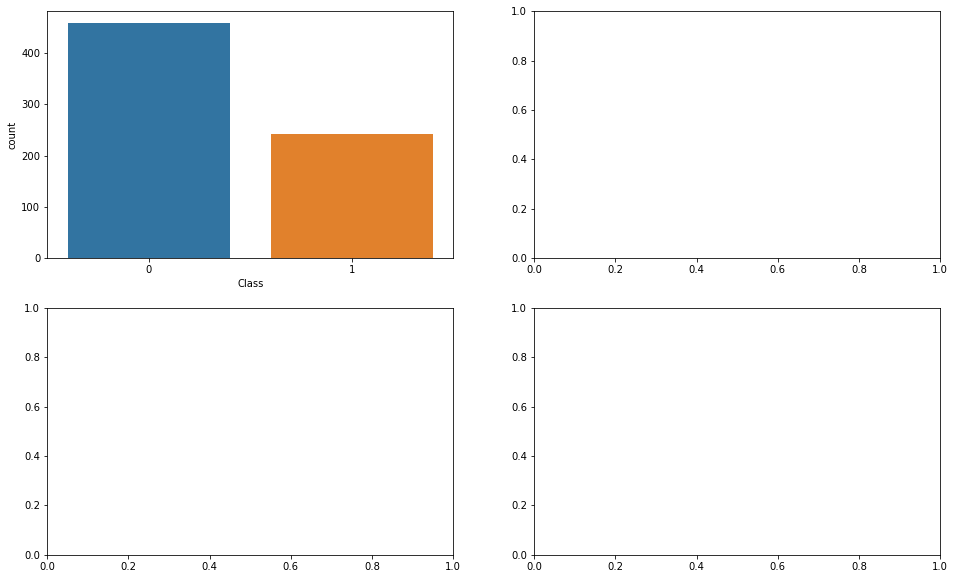

In [23]:
fig,ax = plt.subplots(2,2,figsize = (16,10))

sns.countplot("Class",data=df,ax=ax[0][0])
plt.show()

In [24]:
x  = df.iloc[:,2:-1]
y  = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((489, 9), (210, 9), (489,), (210,))

# LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression 
lm = LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
lm.fit(x_train,y_train)

LogisticRegression()

In [29]:
pre_test = lm.predict(x_test)
pre_test

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [30]:
cf = confusion_matrix(pre_test,y_test)
cf

array([[127,   7],
       [  2,  74]], dtype=int64)

In [31]:
acc =cf.diagonal().sum()/cf.sum()*100
acc

95.71428571428572

In [32]:
print(classification_report(pre_test,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       134
           1       0.91      0.97      0.94        76

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.95       210
weighted avg       0.96      0.96      0.96       210



# decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier 
dt  = DecisionTreeClassifier()

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
pre_x1 = dt.predict(x_test)
pre_x1

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [36]:
dt.feature_importances_

array([0.05185955, 0.73144697, 0.08947822, 0.0228448 , 0.02299155,
       0.03622351, 0.03131698, 0.01383843, 0.        ])

In [37]:
cof = confusion_matrix(pre_x1,y_test)
cof

array([[122,   8],
       [  7,  73]], dtype=int64)

In [38]:
acc1 = cof.diagonal().sum()/cof.sum()*100
acc1

92.85714285714286

In [39]:
print(classification_report(pre_x1,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       130
           1       0.90      0.91      0.91        80

    accuracy                           0.93       210
   macro avg       0.92      0.93      0.92       210
weighted avg       0.93      0.93      0.93       210



# random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
rf_pred = rf.predict(x_test)
rf_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [43]:
mat = confusion_matrix(rf_pred,y_test)
mat

array([[127,   3],
       [  2,  78]], dtype=int64)

In [44]:
acc2 = mat.diagonal().sum()/mat.sum()*100
acc2

97.61904761904762

In [45]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.96      0.97      0.97        80

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.97       210
weighted avg       0.98      0.98      0.98       210



# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors = 17)

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [49]:
pre_knnx  =knn.predict(x_test)

In [50]:
kat = confusion_matrix(pre_knnx,y_test)
kat

array([[127,   4],
       [  2,  77]], dtype=int64)

In [51]:
acc3 = kat.diagonal().sum()/kat.sum()*100
acc3

97.14285714285714

In [52]:
print(classification_report(pre_knnx,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       131
           1       0.95      0.97      0.96        79

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



# SVM - SUPPORT VECTOR MACHINE

In [53]:
from sklearn.svm import SVC
svm = SVC()

In [54]:
svm.fit(x_train,y_train)

SVC()

In [55]:
pre_svm = svm.predict(x_test)
pre_svm

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [56]:
sat = confusion_matrix(pre_svm,y_test)
sat

array([[125,   2],
       [  4,  79]], dtype=int64)

In [57]:
acc13 = sat.diagonal().sum()/sat.sum()*100
acc13

97.14285714285714

In [58]:
print(classification_report(pre_svm,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       127
           1       0.98      0.95      0.96        83

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



# naive BAyes

In [59]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [60]:
nb.fit(x_train,y_train)

MultinomialNB()

In [61]:
pre_nb = nb.predict(x_test)

In [62]:
nat  = confusion_matrix(pre_nb,y_test)
nat

array([[126,  18],
       [  3,  63]], dtype=int64)

In [63]:
acc17  = nat.diagonal().sum()/nat.sum()*100
acc17

90.0

In [64]:
print(classification_report(pre_nb,y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       144
           1       0.78      0.95      0.86        66

    accuracy                           0.90       210
   macro avg       0.88      0.91      0.89       210
weighted avg       0.91      0.90      0.90       210



# XGB BOOST

In [65]:
from xgboost import  XGBClassifier
xgb=XGBClassifier()

In [66]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
pre_xgb = xgb.predict(x_test)

In [68]:
xat = confusion_matrix(pre_xgb,y_test)
xat

array([[125,   7],
       [  4,  74]], dtype=int64)

In [69]:
acc18 = xat.diagonal().sum()/xat.sum()*100
acc18

94.76190476190476

In [70]:
print(classification_report(pre_xgb,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.91      0.95      0.93        78

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.94       210
weighted avg       0.95      0.95      0.95       210



In [71]:
#since the models are overfitting for the data set go for feature selection 

# feature selection

In [72]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()
rfe = RFE(dTree)


In [73]:
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [74]:
rfe.support_

array([ True,  True,  True, False, False,  True, False, False, False])

In [75]:
pdf3 = pd.DataFrame({"Feature support":list(rfe.support_),"columns":list(df.iloc[:,2:-1].columns)})
pdf3


,Feature support,columns
0,True,Cl.thickness
1,True,Cell.size
2,True,Cell.shape
3,False,Marg.adhesion
4,False,Epith.c.size
5,True,BaN
6,False,Bl.cromatin
7,False,Normal.nucleoli
8,False,Mitoses


In [76]:
df1  = df.copy()
df1

,Index,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,BaN,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,0
1,2,1002945,5,4,4,5,7,10.0,3,2,1,0
2,3,1015425,3,1,1,1,2,2.0,3,1,1,0
3,4,1016277,6,8,8,1,3,4.0,3,7,1,0
4,5,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,776715,3,1,1,1,3,2.0,1,1,1,0
695,696,841769,2,1,1,1,2,1.0,1,1,1,0
696,697,888820,5,10,10,3,7,3.0,8,10,2,1
697,698,897471,4,8,6,4,3,4.0,10,6,1,1


In [77]:
df1  =df1.drop(['Id',"Index",'Marg.adhesion','Epith.c.size','Bl.cromatin','Normal.nucleoli','Mitoses'],axis = 1)
df1

,Cl.thickness,Cell.size,Cell.shape,BaN,Class
0,5,1,1,1.0,0
1,5,4,4,10.0,0
2,3,1,1,2.0,0
3,6,8,8,4.0,0
4,4,1,1,1.0,0
...,...,...,...,...,...
694,3,1,1,2.0,0
695,2,1,1,1.0,0
696,5,10,10,3.0,1
697,4,8,6,4.0,1


In [78]:
df1_x = df1.iloc[:,0:-1]
df1_y = df1.iloc[:,-1]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(df1_x,df1_y,test_size = .3,random_state = 101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((489, 4), (210, 4), (489,), (210,))

In [80]:
dTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
pre_rfe = dTree.predict(x_test)

In [82]:
vat = confusion_matrix(pre_rfe,y_test)
vat

array([[122,   6],
       [  7,  75]], dtype=int64)

In [83]:
acc19 = vat.diagonal().sum()/vat.sum()*100
acc19

93.80952380952381

In [84]:
print(classification_report(pre_rfe,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.93      0.91      0.92        82

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210



In [85]:
from sklearn import metrics
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


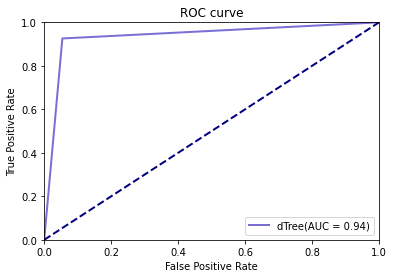

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [86]:
plotAUC(y_test,pre_rfe,"dTree")
plt.show()
plt.figure(figsize  =(6,6))

In [87]:
#CONCULSION
#this data set is have a better and overfitting apporoach on all the alogrithm out of them it is best fitted with decision tree 
#as we tried with xgb boost and feature selection the over fitting arise so decision tree will be the best fit model for this
#historial data  